# Assignment 04
## 20143750 KIM SU BIN

In [32]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ipywidgets import interact
import ipywidgets as widgets
import plotly.offline as py
%matplotlib inline

test = pd.read_csv("mnist_test.csv")

X_train = test.iloc[:,1:].values
Y_train = test.iloc[:,0].values

In [33]:
def assign_labels_to_centroids(clusters, centroids):
    label_centroids = []
    for i in range(len(clusters)):
        labels = map(lambda x: x[0], clusters[i])
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        label_centroids.append(centroid)
    return label_centroids

Assign labels to centroids, and the parameters are clusters and centroids

In [34]:
def init_centroids(labelData,k):
    return map(lambda x: x[1], random.sample(labelData,k))

The init_centroids function randomly picks k from data.

In [35]:
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i, 2], stats[i, 1], stats[i, 0])
        n=X_train[indices][:25].shape[0]
        n_rows = n / 25 + 1
        n_cols = 25
        plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.suptitle(title)
        for i in range(n):
            plt.subplot(n_rows, n_cols, i + 1)
            plt.axis('off')
            plt.imshow(X_train[indices][:25].reshape((28, 28)), cmap=plt.cm.gray)
            plt.title("%d" % y[indices][i])

In [36]:
def clusters_stats(predict, y):
    stats = np.zeros((10, 3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i, :] = clust_stats(cluster)
    return stats


def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)


def clusters_purity(clusters_stats):
    majority_sum = clusters_stats[:, 0].sum()
    n = clusters_stats[:, 1].sum()
    return majority_sum / n


In [37]:
n = 100000
n_digits = 10
X = X_train[0:n, :]
Y = Y_train[0:n]

pca = PCA(n_components=3)
pca_input = X[:1000,:]
X_pca = pca.fit(pca_input).transform(pca_input)
Y_pca = Y[:1000]


In [38]:
scatter = {
        'mode': "markers",
        'name': "y",
        'type': "scatter3d",
        'x': X_pca[:, 0],
        'y': X_pca[:, 1],
        'z': X_pca[:, 2],
        'marker': {'size': 2, 'color': Y_pca, 'colorscale': 'Rainbow'}
    }
    py.iplot({'data':[scatter]})
    plt.show()

IndentationError: unexpected indent (<ipython-input-38-e63409172ba8>, line 10)

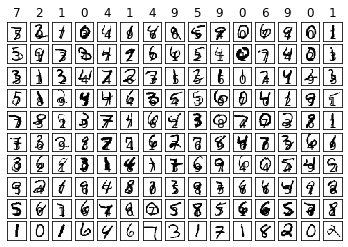

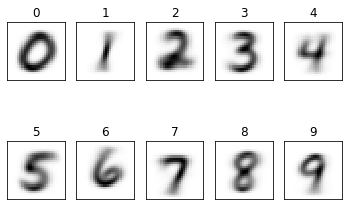

In [39]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

https://github.com/lauren026/assignment04